In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
import seaborn as sns
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import unitroot_adf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA

In [3]:
from read_table import *

In [46]:
table = read_table()

In [5]:
data = table["1"].iloc[:-1,:]

In [6]:
data.index = pd.to_datetime(data['date'])

In [7]:
data.index

DatetimeIndex(['2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-11', '2019-02-12',
               '2019-02-13', '2019-02-14',
               ...
               '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
               '2020-03-24', '2020-03-25'],
              dtype='datetime64[ns]', name='date', length=286, freq=None)

In [8]:
data.tail()

,date,open,high,low,close,volume
date,,,,,,
2020-03-19,2020-03-19,12.68,12.74,11.91,12.23,189145712.0
2020-03-20,2020-03-20,12.40,12.68,12.26,12.52,157835296.0
2020-03-23,2020-03-23,12.00,12.35,11.93,12.15,107111360.0
2020-03-24,2020-03-24,12.40,12.68,12.27,12.61,118020024.0
2020-03-25,2020-03-25,12.88,13.07,12.70,12.87,113695776.0


In [9]:
data.shape

(286, 6)

https://blog.csdn.net/hal_sakai/article/details/51965657

#### 画出原始数据的时间路径图

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


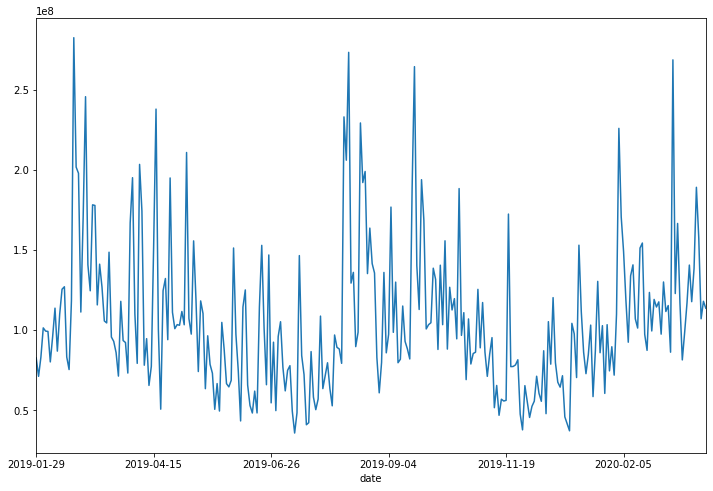

In [10]:
time_series = pd.Series(data.volume)
time_series.index = pd.Index(read_table()["1"].date[:-1])
time_series.plot(figsize=(12,8))
plt.show()

#### 查看平稳度

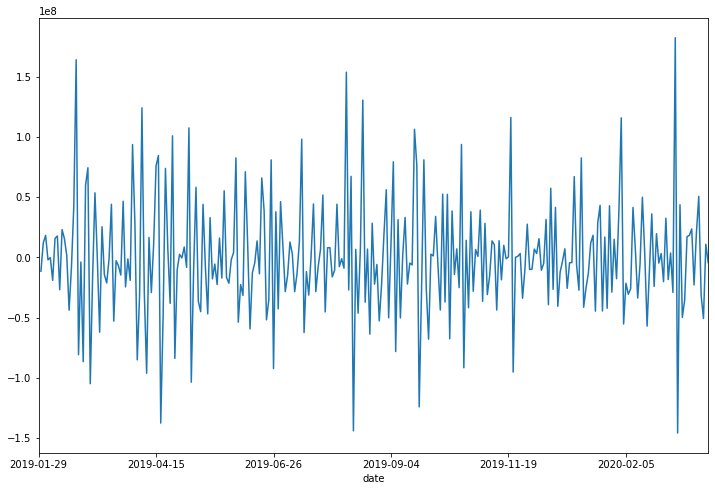

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
diff1 = time_series.diff(1)
diff1.plot(ax=ax1)

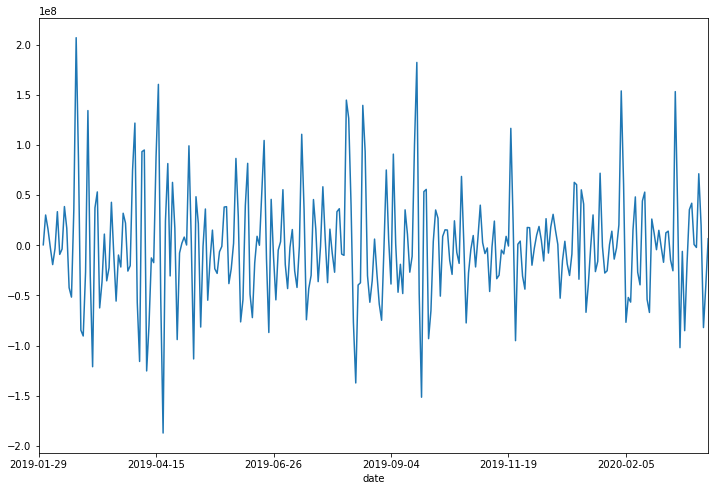

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
diff2 = time_series.diff(2)
diff2.plot(ax=ax1)

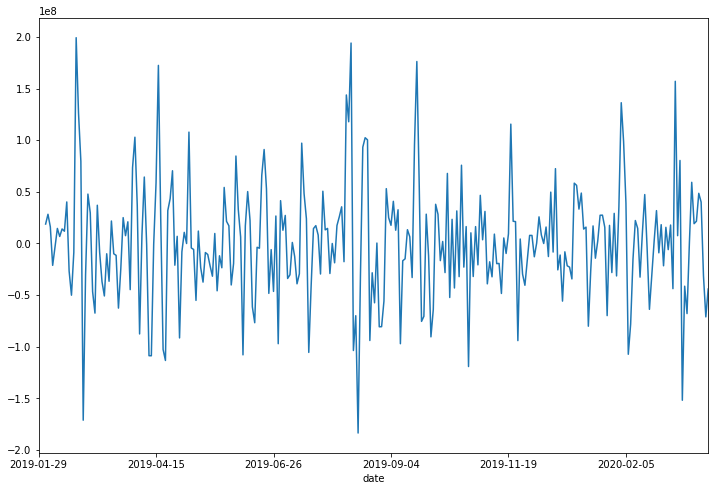

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
diff3 = time_series.diff(3)
diff3.plot(ax=ax1)

#### 自相关和偏相关

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


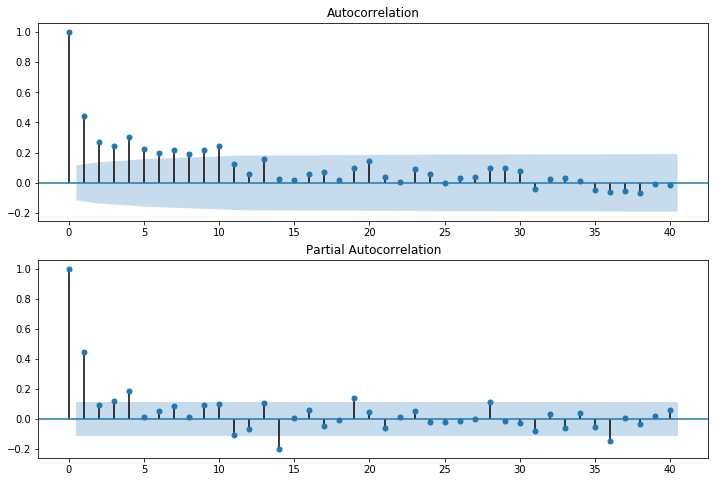

In [14]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(time_series,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(time_series,lags=40,ax=ax2)

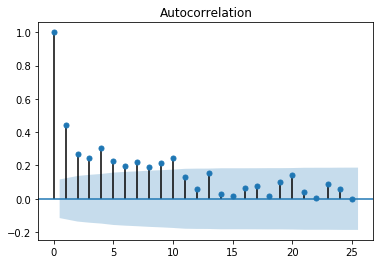

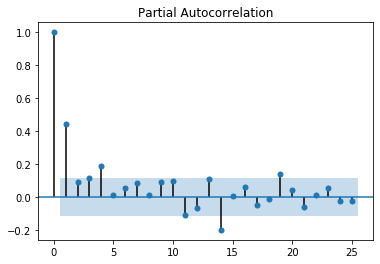

     lag        AC           Q       PAC      Prob(>Q)
0    1.0  0.443621   56.877218  0.443621  4.638889e-14
1    2.0  0.269301   77.910869  0.090265  1.207452e-17
2    3.0  0.242036   94.961133  0.117125  1.882211e-20
3    4.0  0.304730  122.084182  0.185904  1.916210e-25
4    5.0  0.225837  137.034223  0.013054  7.637152e-28
5    6.0  0.198704  148.649093  0.052501  1.493411e-29
6    7.0  0.220331  162.981066  0.084602  7.562501e-32
7    8.0  0.193132  174.032643  0.009635  1.840770e-33
8    9.0  0.216171  187.928138  0.089793  1.116734e-35
9   10.0  0.245817  205.961412  0.095363  9.202198e-39
10  11.0  0.127906  210.861576 -0.102090  4.123283e-39
11  12.0  0.058143  211.877835 -0.063129  1.143397e-38
12  13.0  0.155531  219.176282  0.101543  1.542060e-39
13  14.0  0.027649  219.407778 -0.187904  5.812935e-39
14  15.0  0.019598  219.524512  0.009335  2.228034e-38
15  16.0  0.062067  220.699712  0.055987  5.021361e-38
16  17.0  0.075097  222.426551 -0.044802  8.505395e-38
17  18.0  

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [15]:
plot_acf(time_series)
plot_pacf(time_series)
plt.show()

r,rac,Q = sm.tsa.acf(time_series, qstat=True)
prac = pacf(time_series,method='ywmle')
table_data = np.c_[range(1,len(r)), r[1:],rac,prac[1:len(rac)+1],Q]
table = pd.DataFrame(table_data, columns=['lag', "AC","Q", "PAC", "Prob(>Q)"])

print(table)

#### Model Selection

In [16]:
arma_mod30 = sm.tsa.ARMA(time_series,(3,0)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod40 = sm.tsa.ARMA(time_series,(4,0)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)
arma_mod50 = sm.tsa.ARMA(time_series,(5,0)).fit()
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)

arma_mod31 = sm.tsa.ARMA(time_series,(3,1)).fit()
print(arma_mod31.aic,arma_mod31.bic,arma_mod31.hqic)
arma_mod41 = sm.tsa.ARMA(time_series,(4,1)).fit()
print(arma_mod41.aic,arma_mod41.bic,arma_mod41.hqic)
arma_mod51 = sm.tsa.ARMA(time_series,(5,1)).fit()
print(arma_mod51.aic,arma_mod51.bic,arma_mod51.hqic)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


10841.745459015954 10860.025418070054 10849.072613823138


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


10833.693208930013 10855.629159794933 10842.485794698634


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


10835.62720917466 10861.219151850399 10845.885225904716


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


10833.952651504893 10855.888602369812 10842.745237273513


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


10834.883946717324 10860.475889393063 10845.14196344738


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


10835.519639081816 10864.767573568375 10847.243086773311


#### 残差序列

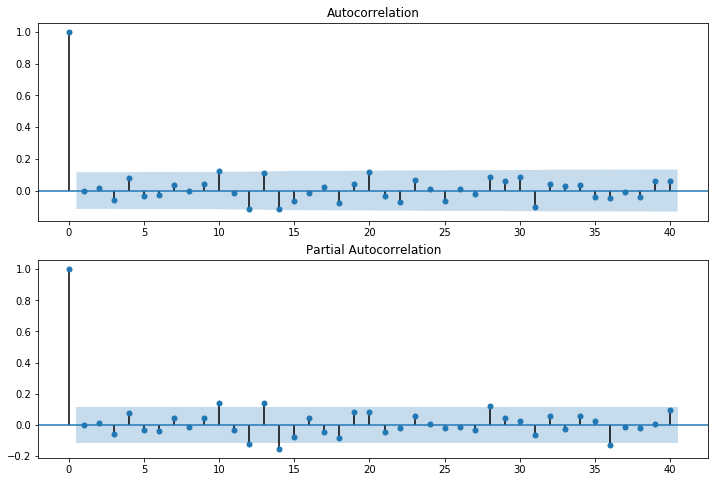

In [17]:
resid = arma_mod31.resid

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.show()

#### DW 检验

In [18]:
print(sm.stats.durbin_watson(arma_mod31.resid.values))

2.00394486116348


#### 是否符合正态分布

NormaltestResult(statistic=95.58807569911897, pvalue=1.751108652941515e-21)


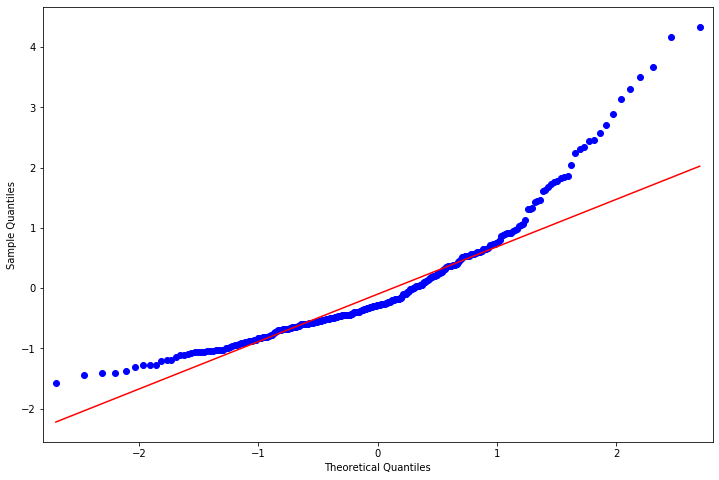

In [19]:
from scipy import  stats
from statsmodels.graphics.api import qqplot
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
#plt.show()

#### Q检验

In [20]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.002774   0.002224  0.962383
2.0   0.013813   0.057560  0.971630
3.0  -0.058634   1.058176  0.787179
4.0   0.078639   2.864439  0.580761
5.0  -0.034315   3.209608  0.667706
6.0  -0.031081   3.493787  0.744796
7.0   0.034607   3.847355  0.797182
8.0  -0.003049   3.850110  0.870387
9.0   0.039960   4.324937  0.888755
10.0  0.125674   9.038413  0.528462
11.0 -0.015558   9.110914  0.611655
12.0 -0.115372  13.112272  0.360933
13.0  0.112196  16.910219  0.203441
14.0 -0.113637  20.820700  0.106316
15.0 -0.064806  22.097185  0.105281
16.0 -0.017279  22.188265  0.137216
17.0  0.025038  22.380222  0.170535
18.0 -0.080692  24.381410  0.142925
19.0  0.042622  24.941835  0.162466
20.0  0.117427  29.211715  0.083674
21.0 -0.031972  29.529440  0.101860
22.0 -0.073145  31.198692  0.092121
23.0  0.069068  32.692712  0.086573
24.0  0.009165  32.719122  0.110140
25.0 -0.066524  34.115745  0.105457
26.0  0.009948  34.147094  0

#### 预测

In [21]:
time_series

date
2019-01-29    8.266311e+07
2019-01-30    7.120010e+07
2019-01-31    8.316227e+07
2019-02-01    1.014270e+08
2019-02-02    9.943150e+07
                  ...     
2020-03-19    1.891457e+08
2020-03-20    1.578353e+08
2020-03-23    1.071114e+08
2020-03-24    1.180200e+08
2020-03-25    1.136958e+08
Name: volume, Length: 286, dtype: float64

In [22]:
# predict_dta = arma_mod31.predict('2020/03/09', '2020/03/25', dynamic=True)
# print(predict_dta)


# fig, ax = plt.subplots(figsize=(12, 8))
# ax = time_series.loc['2020-03-01':].plot(ax=ax)
# fig = arma_mod31.plot_predict('2020/03/09', '2020/03/25', dynamic=True, ax=ax, plot_insample=False)
# plt.show()

In [23]:
n_steps = 21

f, err95, ci95 = arma_mod31.forecast(steps=n_steps) # 95% CI
_, err99, ci99 = arma_mod31.forecast(steps=n_steps, alpha=0.01) # 99% CI

idx = pd.date_range("2020/04/03", periods=n_steps, freq='D')
fc_95 = pd.DataFrame(np.column_stack([f, ci95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([ci99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all.head()

,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99
2020-04-03,1.196740e+08,4.163403e+07,1.711209e+07,1.977140e+08,2.222360e+08
2020-04-04,1.200894e+08,3.731938e+07,1.131114e+07,2.028595e+08,2.288678e+08
2020-04-05,1.186585e+08,3.523650e+07,9.023408e+06,2.020805e+08,2.282936e+08
2020-04-06,1.174854e+08,3.334332e+07,6.903979e+06,2.016274e+08,2.280667e+08
2020-04-07,1.165966e+08,3.164016e+07,4.944902e+06,2.015531e+08,2.282484e+08


#### 以下为补充

In [24]:
t=sm.tsa.stattools.adfuller(time_series, )
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
print(output)

                                value
Test Statistic Value         -3.33408
p-value                      0.013422
Lags Used                          13
Number of Observations Used       272
Critical Value(1%)           -3.45462
Critical Value(5%)           -2.87223
Critical Value(10%)          -2.57246


In [25]:
p,d,q = (5,1,1)
arma_mod = ARMA(time_series,(p,d,q)).fit(disp=-1,method='mle')
summary = (arma_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                   Results: ARMA
Model:                    ARMA                 BIC:                     10864.7676  
Dependent Variable:       volume               Log-Likelihood:          -5409.8     
Date:                     2020-05-31 22:59     Scale:                   1.0000      
No. Observations:         286                  Method:                  mle         
Df Model:                 7                    Sample:                  0           
Df Residuals:             279                                           6           
Converged:                1.0000               S.D. of innovations:     39645926.195
No. Iterations:           25.0000              HQIC:                    10847.243   
AIC:                      10835.5196                                                
------------------------------------------------------------------------------------
                 Coef.        Std.Err.      t    P>|t|      [0.025        0.975]    
----------------

In [26]:
# time_series = time_series.diff(1)
# time_series = time_series.dropna(how=any)
# time_series.plot(figsize=(8,6))
# plt.show()
# t=sm.tsa.stattools.adfuller(time_series)
# output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
# output['value']['Test Statistic Value'] = t[0]
# output['value']['p-value'] = t[1]
# output['value']['Lags Used'] = t[2]
# output['value']['Number of Observations Used'] = t[3]
# output['value']['Critical Value(1%)'] = t[4]['1%']
# output['value']['Critical Value(5%)'] = t[4]['5%']
# output['value']['Critical Value(10%)'] = t[4]['10%']
# print(output)

确定自相关系数和平均移动系数（p,q）

In [27]:
(p, q) =(sm.tsa.arma_order_select_ic(time_series,max_ar=3,max_ma=3,ic='aic')['aic_min_order'])
(p, q)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(3, 3)

In [28]:
arma_mod = ARMA(time_series,(3,3)).fit(disp=-1,method='mle')
resid = arma_mod.resid
t=sm.tsa.stattools.adfuller(resid)
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [29]:
output

,value
Test Statistic Value,-16.5142
p-value,2.09264e-29
Lags Used,0
Number of Observations Used,285
Critical Value(1%),-3.45351
Critical Value(5%),-2.87174
Critical Value(10%),-2.5722


In [30]:
arma_model = sm.tsa.ARMA(time_series,(0,1)).fit(disp=-1,maxiter=100)

predict_data = arma_model.predict(start="2019/03/19", end="2019/03/26", dynamic = False)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [31]:
predict_data

NameError: name 'predict_data' is not defined

In [32]:
predict_data = arma_model.predict(start="2020-03-19", end="2020-03-25", dynamic=False)
predict_data

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
plt.plot(predict_data)
plt.plot(time_series[-5:])
plt.xticks(rotation=-90)
plt.show()

## ARMA

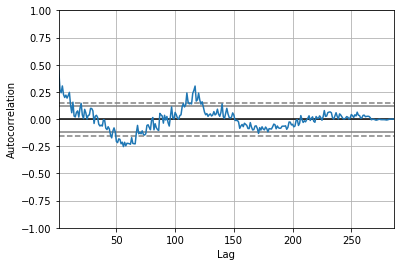

In [33]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(time_series)

In [34]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(time_series, autolag='AIC')
# 这里打印的还是adf检验的p_value，很小（小于0.05），证明平稳
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
print(output)

                                   value
Test Statistic Value            -16.5142
p-value                      2.09264e-29
Lags Used                              0
Number of Observations Used          285
Critical Value(1%)              -3.45351
Critical Value(5%)              -2.87174
Critical Value(10%)              -2.5722


In [35]:
from statsmodels.stats.diagnostic import acorr_ljungbox
p_value = acorr_ljungbox(time_series, lags=1)[1]

In [36]:
print("LB p-value:{}".format(p_value))

LB p-value:[4.63888893e-14]


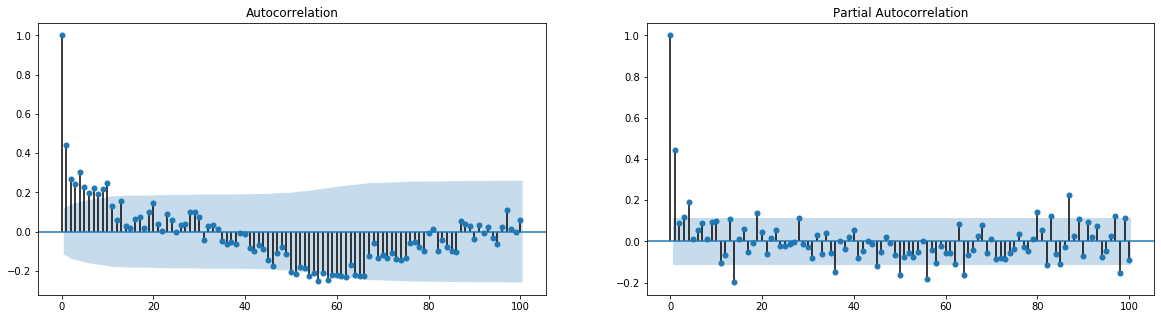

In [37]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

lag_acf = acf(time_series, nlags=20)
lag_pacf = pacf(time_series, nlags=20, method='ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(time_series, lags=100, ax=axes[0])
plot_pacf(time_series, lags=100, ax=axes[1])
plt.show()

In [38]:
arma_model = sm.tsa.ARMA(time_series,(1,1)).fit(disp=-1,maxiter=100)

predict_data = arma_model.predict(start="2019-03-19", end="2019-03-26", dynamic = False)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [39]:
predict_data = arma_model.predict(start="2019-01-29", end="2020-03-25", dynamic=False)
predict_data

date
2019-01-29    1.062915e+08
2019-01-30    9.701225e+07
2019-01-31    9.033129e+07
2019-02-01    9.043264e+07
2019-02-02    9.543419e+07
                  ...     
2020-03-19    1.208060e+08
2020-03-20    1.367055e+08
2020-03-23    1.382335e+08
2020-03-24    1.259549e+08
2020-03-25    1.213190e+08
Length: 286, dtype: float64

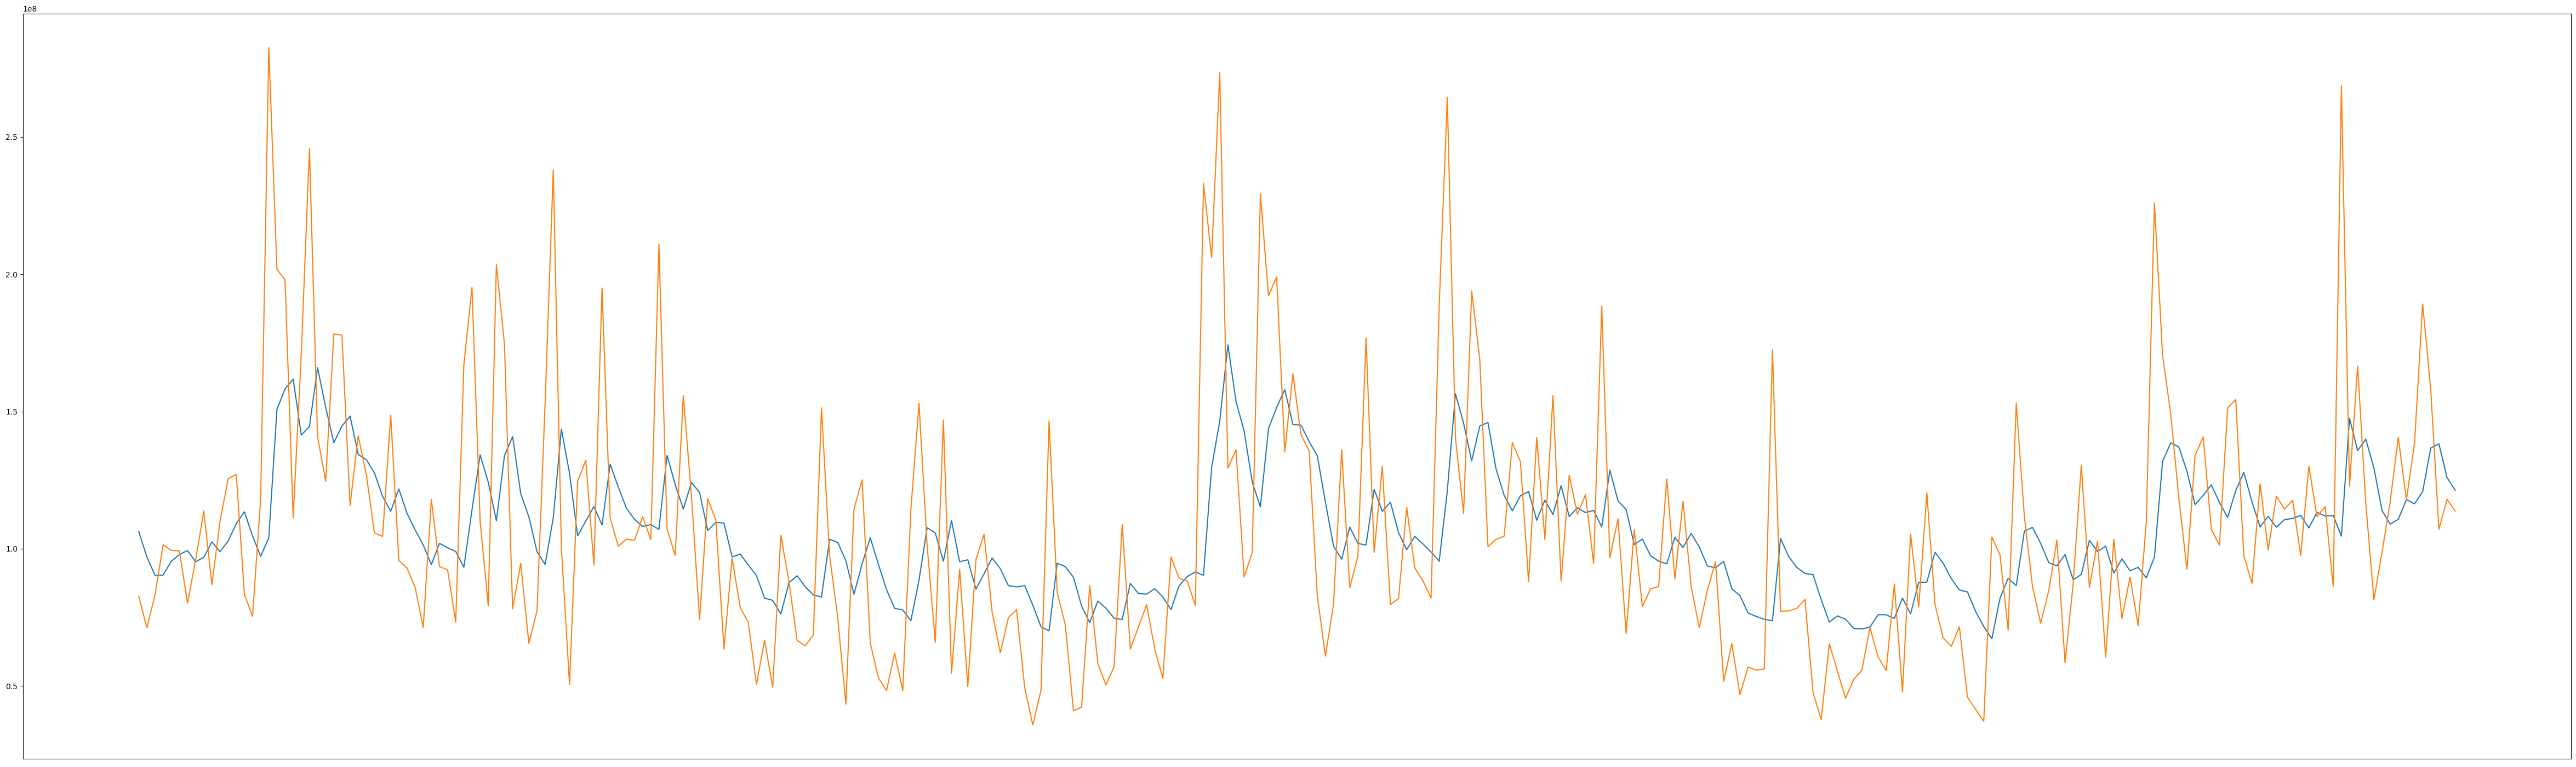

In [44]:
fig = plt.figure(figsize=(60, 18), dpi=100, facecolor="white")
plt.plot(predict_data)
plt.plot(time_series)
plt.xticks([])
plt.xticks(rotation=-90)
plt.show()

In [41]:
# forcast=pd.DataFrame(arma_model.forecast(1)[0],index=table["1"].loc[-1:, :],columns=['forcastsales'])

n_steps = 21

f, err95, ci95 = arma_model.forecast(steps=n_steps) # 95% CI
_, err99, ci99 = arma_model.forecast(steps=n_steps, alpha=0.01) # 99% CI

idx = pd.date_range("2020/04/03", periods=n_steps, freq='D')
fc_95 = pd.DataFrame(np.column_stack([f, ci95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([ci99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all.head()

,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99
2020-04-03,1.173701e+08,3.824488e+07,1.338194e+07,1.964953e+08,2.213582e+08
2020-04-04,1.159224e+08,3.415831e+07,8.466184e+06,1.976864e+08,2.233785e+08
2020-04-05,1.146638e+08,3.096071e+07,4.659290e+06,1.983669e+08,2.246683e+08
2020-04-06,1.135697e+08,2.843054e+07,1.677867e+06,1.987089e+08,2.254616e+08
2020-04-07,1.126186e+08,2.641002e+07,-6.786879e+05,1.988272e+08,2.259160e+08


## Build Model

In [47]:
from ARMA import run_arma
data = table["1"]
data.index = pd.to_datetime(data.date)
time_series = pd.Series(data.close)
time_series.index = pd.Index(data.index)
# time_series
fc = run_arma(time_series, "2020/03/27/", 7).forecast
fc = pd.DataFrame(fc)
fc.index.name = 'date'
fc

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,forecast
date,
2020-03-27,13.775036
2020-03-28,14.293048
2020-03-29,14.293048
2020-03-30,14.293048
2020-03-31,14.293048
2020-04-01,14.293048
2020-04-02,14.293048


In [48]:
fc.forecast

date
2020-03-27    13.775036
2020-03-28    14.293048
2020-03-29    14.293048
2020-03-30    14.293048
2020-03-31    14.293048
2020-04-01    14.293048
2020-04-02    14.293048
Freq: D, Name: forecast, dtype: float64

In [49]:
fc.forecast.shift(-1)

date
2020-03-27    14.293048
2020-03-28    14.293048
2020-03-29    14.293048
2020-03-30    14.293048
2020-03-31    14.293048
2020-04-01    14.293048
2020-04-02          NaN
Freq: D, Name: forecast, dtype: float64

In [56]:
from ARMA import run_arma

table = read_table()
price = pd.DataFrame(columns=list(range(1, 11)))
n = 7
for i in range(1, 11):
    data = table[str(i)]
    data.index = pd.to_datetime(data.date)
    time_series = pd.Series(data.close)
    time_series.index = pd.Index(data.index)
    fc = run_arma(time_series, "2020/03/27/", 7).forecast
    fc = pd.DataFrame(fc)
    fc.index.name = 'date'
    price.iloc[:, i-1] = (pd.Series(np.log(fc.forecast))-np.log(fc.forecast.shift(-1)*100).dropna(axis=0, how=any))
price

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: R

,1,2,3,4,5,6,7,8,9,10
date,,,,,,,,,,
2020-03-27,-4.642085,-4.616858,-4.751449,-4.61666,-4.634857,-4.612405,-4.463093,-4.402769,-4.65060,-4.727667
2020-03-28,-4.605170,-4.605170,-4.605170,-4.60517,-4.605170,-4.605170,-4.605170,-4.605170,-4.60517,-4.605170
2020-03-29,-4.605170,-4.605170,-4.605170,-4.60517,-4.605170,-4.605170,-4.605170,-4.605170,-4.60517,-4.605170
2020-03-30,-4.605170,-4.605170,-4.605170,-4.60517,-4.605170,-4.605170,-4.605170,-4.605170,-4.60517,-4.605170
2020-03-31,-4.605170,-4.605170,-4.605170,-4.60517,-4.605170,-4.605170,-4.605170,-4.605170,-4.60517,-4.605170
2020-04-01,-4.605170,-4.605170,-4.605170,-4.60517,-4.605170,-4.605170,-4.605170,-4.605170,-4.60517,-4.605170
2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
graph = []
for i in range(1, 11):
    high_low_diff = table[str(i)].high-table[str(i)].low
    oc = (table[str(i)].open-table[str(i)].close)/table[str(i)].open
    graph.append([high_low_diff.std(), high_low_diff.mean(), oc.mean(), oc.std(), price[i].std(), price[i].mean()])
graph = pd.DataFrame(graph, columns=["diff_mean", "diff_std", "oc_ratio_mean", "oc_ratio_std", "exp_std", "exp_mean"])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
graph = scaler.fit_transform(graph).round(4)
graph = pd.DataFrame(graph, columns=["diff_mean", "diff_std", "oc_ratio_mean", "oc_ratio_std", "exp_std", "exp_mean"])
graph

,diff_mean,diff_std,oc_ratio_mean,oc_ratio_std,exp_std,exp_mean
0,-0.4503,-0.4244,-0.1700,-0.1277,-0.5757,0.3128
1,-0.2427,-0.1822,1.0757,-0.4531,-0.9515,-0.6048
2,-0.4748,-0.4759,-1.4332,2.0372,1.0532,1.1005
3,0.0708,0.0249,0.1341,-0.2862,-0.9544,-0.9261
4,-0.4754,-0.4753,0.2196,0.4617,-0.6834,0.8565
5,-0.1170,-0.1247,0.6191,-0.1219,-1.0178,-0.6523
6,2.9473,2.9537,-1.6619,0.6565,0.9906,-2.0098
7,-0.2296,-0.2819,-0.9421,0.6323,1.8891,-0.1700
8,-0.5127,-0.5063,0.6723,-0.8649,-0.4489,1.2037
9,-0.5156,-0.5079,1.4863,-1.9338,0.6990,0.8896


In [52]:
g1 = graph[(graph.oc_ratio_std>=0)&(graph.exp_mean>=0)]
g1

,diff_mean,diff_std,oc_ratio_mean,oc_ratio_std,exp_std,exp_mean
2,-0.4748,-0.4759,-1.4332,2.0372,1.0532,1.1005
4,-0.4754,-0.4753,0.2196,0.4617,-0.6834,0.8565


In [53]:
w = []
for i in g1.index:
    w2 = g1.oc_ratio_mean[i]
    w3 = g1.exp_std[i]*4
    print(w2,w3)
    w.append(w2+w3)
print(w)
w = np.array(w)
w = w/w.sum().round(4)
w

-1.4332 4.2128
0.2196 -2.7336
[2.7795999999999994, -2.5140000000000002]


array([10.46536145, -9.46536145])

In [54]:
x = np.zeros(10)
W = np.zeros(10)
print(x)
for i,j in zip(g1.index, range(g1.index.shape[0])):
    x[i] = w[j]*3000
    W[i] = w[j]
print(W)
print(x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          0.         10.46536145  0.         -9.46536145  0.
  0.          0.          0.          0.        ]
[     0.              0.          31396.08433735      0.
 -28396.08433735      0.              0.              0.
      0.              0.        ]


In [55]:
dd  = []
S = np.arange(1, 11)
P = np.arange(1, 11)
B = np.arange(1, 11)
for w, x, s, p, b in zip(W, x, S, P, B):
    dd.append([w,x,s,p,b])
dd = pd.DataFrame(data=dd, index=list(range(1,11)), columns=["W", "X", "S", "P", "B"])
dd

,W,X,S,P,B
1,0.000000,0.000000,1,1,1
2,0.000000,0.000000,2,2,2
3,10.465361,31396.084337,3,3,3
4,0.000000,0.000000,4,4,4
5,-9.465361,-28396.084337,5,5,5
6,0.000000,0.000000,6,6,6
7,0.000000,0.000000,7,7,7
8,0.000000,0.000000,8,8,8
9,0.000000,0.000000,9,9,9
10,0.000000,0.000000,10,10,10


In [ ]:
print("您购买的股票为：{}".format(list(g1.index)))
print("________________________________________________________")
print("您所持有的股票份额:")
for i in range(1, 11):
    if dd.X[i]>0:
        print("股票: {0}, 份额: {1}, 金额: {2}".format(i, dd.X[i]/dd.S[i], dd.X[i]))
print("总投入: {0}".format((dd.X/dd.S).sum()))
print("________________________________________________________")
print("预计每支收入:")
for i in range(1, 11):
    if dd.X[i]>0:
        print("股票: {0}, 收入: {1}".format(i, dd.X[i]*dd.P[i]))
print("预计总收入: {}".format((dd.X*dd.P).sum()))
# print("预计净收入: {}".)
print("________________________________________________________")


In [ ]:
def 